# Decision Trees, Random Forest, and Logistic Regression

DataDource: https://www.kaggle.com/rakeshrau/social-network-ads

Dataset tells which of the users purchased/not purchased a particular product.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier 
%matplotlib inline

In [2]:
df = pd.read_csv('../dataset/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


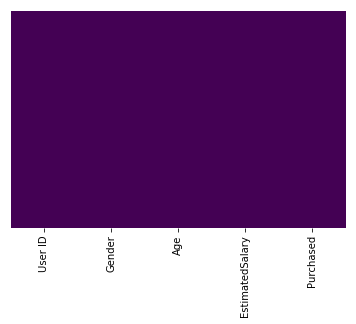

In [3]:
# to check missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
# LabelEncoder - Encoding categorical data to number, OneHotEncoder - row to column 
# only used for Type column
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df[['Gender']])
#onehotencoder = OneHotEncoder(categorical_features = [0])
#y = onehotencoder.fit_transform(y).toarray()
df.head()

/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


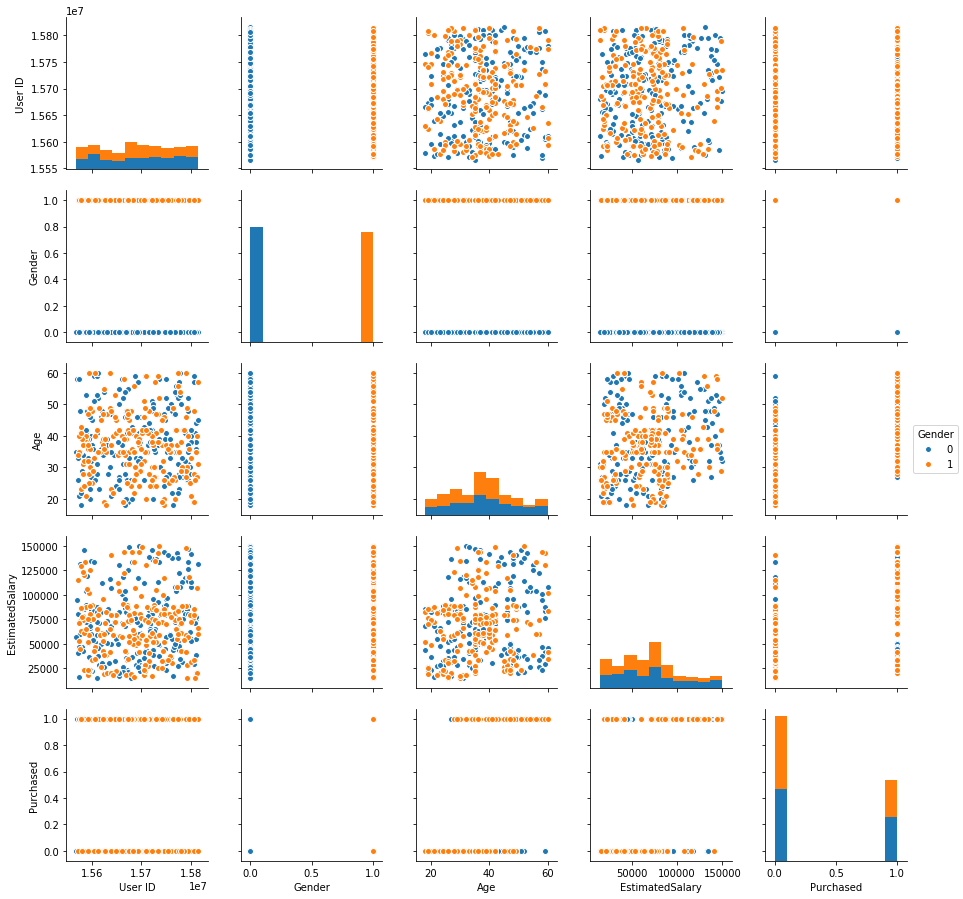

In [19]:
# to see pattern
sns.pairplot(data=df, hue="Gender")

In [6]:
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

In [7]:
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 100)

/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Decision Tree

In [8]:
classifier = DecisionTreeClassifier(criterion ='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
y_pred = classifier.predict(X_test)

## Validation

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

array([[60,  5],
       [ 9, 26]])

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.87      0.92      0.90        65
          1       0.84      0.74      0.79        35

avg / total       0.86      0.86      0.86       100



In [12]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Accuracy :  86.0


## Tree Visualization

In [13]:
#install
#conda install -c https://conda.binstar.org/sstromberg pydot
#conda install GraphViz
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X)
features

['Gender', 'Age', 'EstimatedSalary']

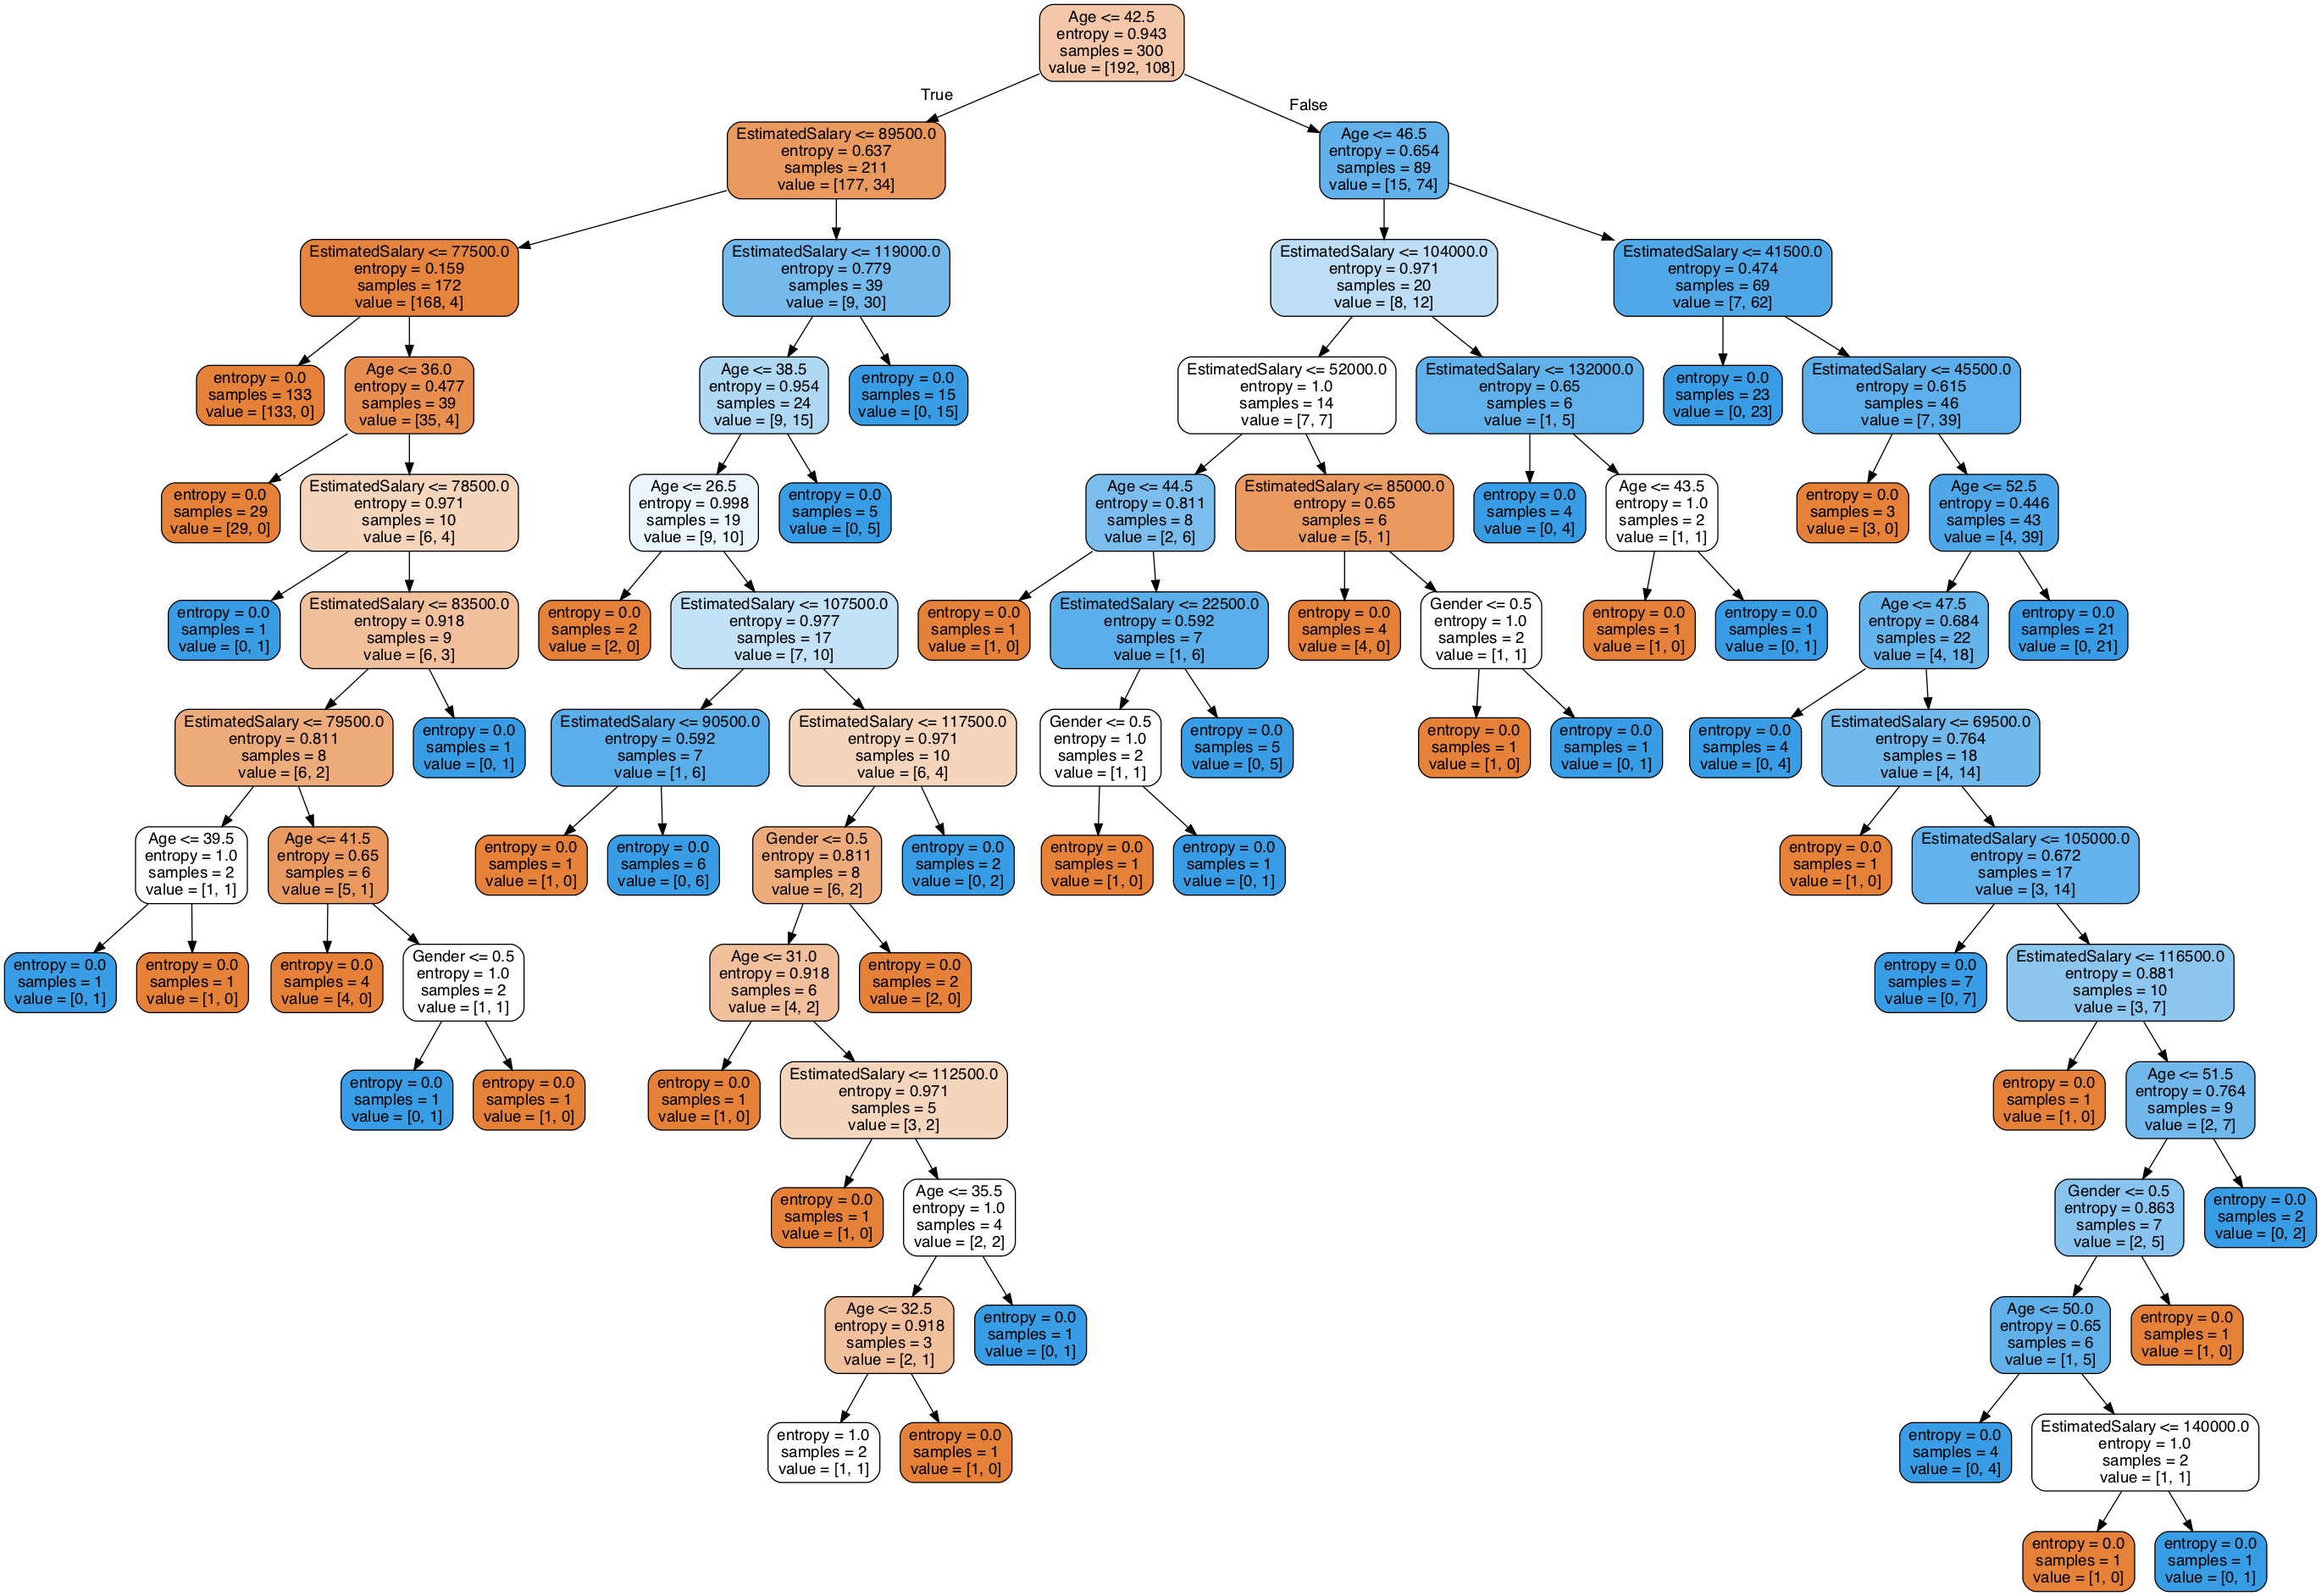

In [14]:
dot_data = StringIO()  
export_graphviz(classifier, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Random Forests

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
rfc_pred = rfc.predict(X_test)

In [17]:
print(confusion_matrix(y_test,rfc_pred))

[[62  3]
 [ 7 28]]


In [18]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.90      0.95      0.93        65
          1       0.90      0.80      0.85        35

avg / total       0.90      0.90      0.90       100



# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
predictions = logmodel.predict(X_test)

### Evaluation

In [26]:
print(confusion_matrix(y_test,rfc_pred))

[[62  3]
 [ 7 28]]


In [27]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.65      1.00      0.79        65
          1       0.00      0.00      0.00        35

avg / total       0.42      0.65      0.51       100



/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Thank You!